<a href="https://colab.research.google.com/github/gabrielantonyxaviour/aptos-hack/blob/ML-model-to-predict-influencers-score-and-correlation-factor/Copy_of_ML_model_to_predict_influencers_score_and_correlation_factor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML MODEL

# Load Data

In [143]:
import numpy as np
import pandas as pd

In [146]:
from google.colab import files

In [148]:
uploaded = files.upload()

Saving social_media_dataset2.csv to social_media_dataset2.csv


In [149]:
import io

In [150]:
df = pd.read_csv(io.BytesIO(uploaded['social_media_dataset2.csv']))
df

,Follower Count,Likes,Comments,Engagement Rate,Quality of Followers,Ad Products Sold,Berries
0,1673930,9465,588,0.194220,0.539939,317,50218
1,5909173,1353,751,0.015765,0.075259,323,177275
2,3745103,1157,806,0.024333,0.102069,250,112353
3,4535395,2037,324,0.018475,0.075755,220,136062
4,8250954,2728,938,0.017877,0.040601,50,247529
...,...,...,...,...,...,...,...
4995,3587894,5820,747,0.063238,0.227705,454,107637
4996,4786511,7356,866,0.058769,0.136425,113,143595
4997,32435,9835,864,10.961307,29.987976,327,97
4998,8899009,6876,368,0.026075,0.086580,383,266970


from matplotlib import pyplot as plt
df['Follower Count'].plot(kind='hist', bins=20, title='Follower Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Likes'].plot(kind='hist', bins=20, title='Likes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Comments'].plot(kind='hist', bins=20, title='Comments')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Engagement Rate'].plot(kind='hist', bins=20, title='Engagement Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Follower Count', y='Likes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Likes', y='Comments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Comments', y='Engagement Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Engagement Rate', y='Quality of Followers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Follower Count'].plot(kind='line', figsize=(8, 4), title='Follower Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Likes'].plot(kind='line', figsize=(8, 4), title='Likes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Comments'].plot(kind='line', figsize=(8, 4), title='Comments')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Engagement Rate'].plot(kind='line', figsize=(8, 4), title='Engagement Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

# Data preperation

## Data seperation as X and Y

In [152]:
y = df['Berries']
y

,Berries
0,50218
1,177275
2,112353
3,136062
4,247529
...,...
4995,107637
4996,143595
4997,97
4998,266970


In [153]:
x = df.drop('Berries',axis=1)
x

,Follower Count,Likes,Comments,Engagement Rate,Quality of Followers,Ad Products Sold
0,1673930,9465,588,0.194220,0.539939,317
1,5909173,1353,751,0.015765,0.075259,323
2,3745103,1157,806,0.024333,0.102069,250
3,4535395,2037,324,0.018475,0.075755,220
4,8250954,2728,938,0.017877,0.040601,50
...,...,...,...,...,...,...
4995,3587894,5820,747,0.063238,0.227705,454
4996,4786511,7356,866,0.058769,0.136425,113
4997,32435,9835,864,10.961307,29.987976,327
4998,8899009,6876,368,0.026075,0.086580,383


## Data splitting

In [154]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


In [155]:
x_train

,Follower Count,Likes,Comments,Engagement Rate,Quality of Followers,Ad Products Sold
4833,5731398,882,207,0.007145,0.029504,109
1218,6346265,8417,851,0.049175,0.109696,90
135,2589518,7561,671,0.105734,0.245142,109
3612,8936842,8212,448,0.031076,0.082562,228
3259,8180589,8834,157,0.033740,0.100533,338
...,...,...,...,...,...,...
4149,1377234,5386,471,0.141261,0.502674,379
1890,3805317,3239,247,0.030079,0.143830,398
350,2434267,3103,761,0.060125,0.160015,121
79,5364862,5267,890,0.041065,0.146699,433


In [156]:
x_test

,Follower Count,Likes,Comments,Engagement Rate,Quality of Followers,Ad Products Sold
789,8279993,4841,782,0.024151,0.091104,443
2507,8907017,1257,73,0.004807,0.029285,219
2376,7080434,8657,155,0.038212,0.115179,343
1378,5213048,9642,62,0.056320,0.120467,51
598,8905016,3146,423,0.013924,0.062524,386
...,...,...,...,...,...,...
1451,8477220,4469,65,0.016352,0.038555,62
4921,3094130,2380,873,0.042826,0.173819,341
3091,2717967,8961,59,0.100428,0.297987,330
3683,9200428,1838,776,0.011897,0.028403,53


# **Model building**

## **Linear Regression**

### Traning model

In [157]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Apply model to make prediction

In [158]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [159]:
y_lr_train_pred

array([171151.39389824, 190041.91064906,  74781.38383913, ...,
        70147.92234237, 159984.0753704 , 182859.281841  ])

In [160]:
y_lr_test_pred

array([ 2.49367248e+05,  2.68486250e+05,  2.12305490e+05,  1.55015504e+05,
        2.68470574e+05,  1.53540776e+05,  2.96332502e+05,  1.89041584e+05,
        1.45444661e+05, -1.30105051e+03,  1.12505678e+05,  2.98980540e+05,
        2.84710173e+05,  9.65518666e+04,  1.89241918e+05,  3.00590660e+05,
        2.14463822e+05,  2.64904301e+05,  7.15706459e+04,  3.84489914e+03,
        9.52095407e+04,  2.64388330e+05,  1.67180675e+02,  1.13571484e+05,
        2.58612160e+05,  1.40964163e+05,  1.29027323e+05,  2.25707190e+05,
        2.99529079e+05,  2.24878387e+05,  1.57821367e+05,  8.86185974e+04,
        7.39310719e+03,  2.48971102e+05,  1.33436464e+05,  1.15631972e+05,
        2.00445520e+05,  1.27301544e+05,  1.63524943e+05,  1.55979634e+05,
        7.43287585e+04,  3.73395360e+04,  1.80367179e+05,  6.28732308e+04,
        1.13036052e+05,  6.87556808e+04,  4.11963781e+04,  2.95697831e+05,
        3.18254371e+04,  2.01144287e+05,  5.71081563e+04,  1.61433272e+04,
        2.17117556e+05,  

###Evaluate model performance

In [161]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [162]:
print("Linear Regression Model Performance:")
print("Training MSE:", lr_train_mse)
print("Training R2:", lr_train_r2)
print("Test MSE:", lr_test_mse)
print("Test R2:", lr_test_r2)

Linear Regression Model Performance:
Training MSE: 17581063.5023471
Training R2: 0.9977653206074479
Test MSE: 15516849.539813897
Test R2: 0.9979075157489722


In [163]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Testing MSE','Test R2']

In [164]:
lr_results

,Method,Training MSE,Training R2,Testing MSE,Test R2
0,Linear regression,17581063.502347,0.997765,15516849.539814,0.997908


## Random Forest

## Training the model

In [165]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying the model to make a prediction

In [166]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### Evaluating Model performance

In [167]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [168]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,457465001.418362,0.941853,448005795.186212,0.939585


## Model Comparison

In [169]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Testing MSE,Test R2,Test MSE
0,Linear regression,17581063.502347,0.997765,15516849.539814,0.997908,NaN
1,Random forest,457465001.418362,0.941853,NaN,0.939585,448005795.186212


from matplotlib import pyplot as plt
import seaborn as sns
_df_33.groupby('Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_34.groupby('Training MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_35.groupby('Training R2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_36.groupby('Testing MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training MSE'].value_counts()
    for x_label, grp in _df_37.groupby('Method')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Method')
_ = plt.ylabel('Training MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training R2'].value_counts()
    for x_label, grp in _df_38.groupby('Training MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training MSE')
_ = plt.ylabel('Training R2')

<string>:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Testing MSE'].value_counts()
    for x_label, grp in _df_39.groupby('Training R2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training R2')
_ = plt.ylabel('Testing MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test R2'].value_counts()
    for x_label, grp in _df_40.groupby('Testing MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Testing MSE')
_ = plt.ylabel('Test R2')

In [170]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Testing MSE,Test R2,Test MSE
0,Linear regression,17581063.502347,0.997765,15516849.539814,0.997908,NaN
1,Random forest,457465001.418362,0.941853,NaN,0.939585,448005795.186212


from matplotlib import pyplot as plt
import seaborn as sns
_df_41.groupby('Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_42.groupby('Training MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_43.groupby('Training R2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_44.groupby('Testing MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training MSE'].value_counts()
    for x_label, grp in _df_45.groupby('Method')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Method')
_ = plt.ylabel('Training MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training R2'].value_counts()
    for x_label, grp in _df_46.groupby('Training MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training MSE')
_ = plt.ylabel('Training R2')

<string>:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Testing MSE'].value_counts()
    for x_label, grp in _df_47.groupby('Training R2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training R2')
_ = plt.ylabel('Testing MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test R2'].value_counts()
    for x_label, grp in _df_48.groupby('Testing MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Testing MSE')
_ = plt.ylabel('Test R2')

# Data visualization of predicted result

Text(0.5, 0, 'Experimental Score')

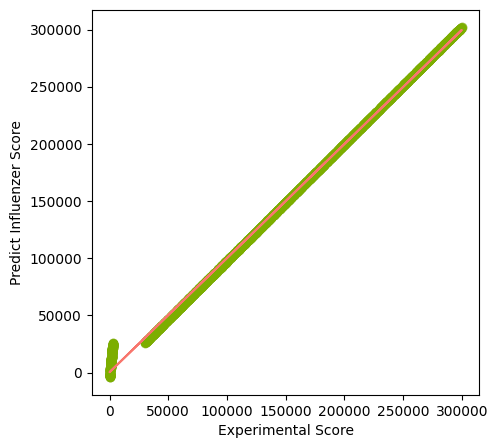

In [171]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train,p(y_train),"#F8766D")
plt.ylabel('Predict Influenzer Score')
plt.xlabel('Experimental Score')

In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame containing the data

# Separate features (x) and target (y)
y = df['Berries']
x = df.drop('Berries', axis=1)


# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# To predict the 'Influencer Score' for new data, use:
# new_data_predictions = model.predict(new_data)

Mean Squared Error: 15516849.539813897
R-squared: 0.9979075157489722


In [174]:
import pandas as pd

# Assuming 'df' is your DataFrame
correlations = df.corr()['Berries']

# Print the correlations
print(correlations)

Follower Count          0.998895
Likes                   0.001893
Comments                0.014688
Engagement Rate        -0.090147
Quality of Followers   -0.103922
Ad Products Sold       -0.014308
Berries                 1.000000
Name: Berries, dtype: float64


In [182]:
!pip install seaborn==0.12.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2


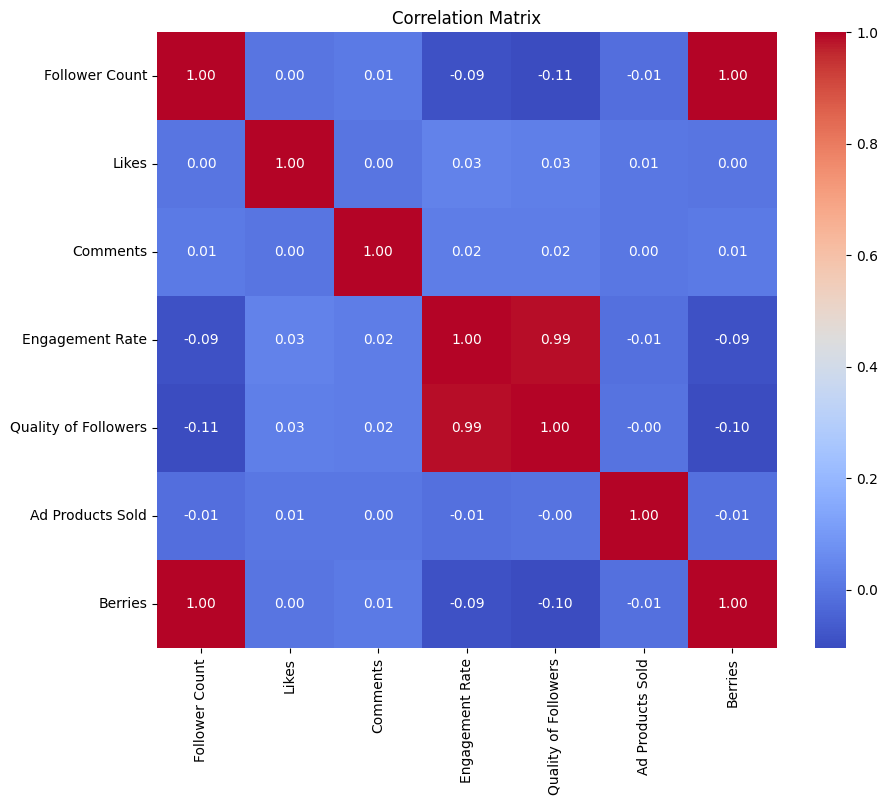

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlations = df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [177]:
def calculate_berries_score(follower_count, likes, comments, engagement_rate, quality_of_followers, ad_products_sold):
    """Calculates the Berries score for an influencer.

    Args:
        follower_count: The number of followers.
        likes: The number of likes on a post.
        comments: The number of comments on a post.
        engagement_rate: The engagement rate of the influencer's posts.
        quality_of_followers: A measure of the quality of the influencer's followers.
        ad_products_sold: The number of ad products sold by the influencer.

    Returns:
        The Berries score.
    """
    # Calculate Total Followers Count (tf)
    if follower_count >= 10000000:
        tf = 10
    elif follower_count >= 1000000:
        tf = 100
    elif follower_count >= 100000 and follower_count < 1000000:  # 0.1 to 0.999 Million
        tf = 1000
    elif follower_count >= 1000 and follower_count < 100000: #0.001 to 0.099 Million
        tf = 1000
    else:  # Less than 0.0001 million (100)
        tf = 5000

    # Calculate Berries Score
    berries_score = ((follower_count * 3) + engagement_rate + quality_of_followers) / tf

    return berries_score

# ... (rest of the code remains the same)

In [179]:
def calculate_berries_score(follower_count, likes, comments, engagement_rate, quality_of_followers, ad_products_sold):
    """Calculates the Berries score for an influencer.

    Args:
        follower_count: The number of followers.
        likes: The number of likes on a post.
        comments: The number of comments on a post.
        engagement_rate: The engagement rate of the influencer's posts.
        quality_of_followers: A measure of the quality of the influencer's followers.
        ad_products_sold: The number of ad products sold by the influencer.

    Returns:
        The Berries score.
    """
    # Calculate Total Followers Count (tf)
    if follower_count >= 10000000:
        tf = 10
    elif follower_count >= 1000000:
        tf = 100
    elif follower_count >= 100000 and follower_count < 1000000:  # 0.1 to 0.999 Million
        tf = 1000
    elif follower_count >= 1000 and follower_count < 100000: #0.001 to 0.099 Million
        tf = 1000
    else:  # Less than 0.0001 million (100)
        tf = 5000

    # Calculate Berries Score
    berries_score = ((follower_count * 3) + engagement_rate + quality_of_followers) / tf

    return berries_score

# Get manual input for parameters
follower_count = int(input("Enter Follower Count: "))
likes = int(input("Enter Likes: "))
comments = int(input("Enter Comments: "))
engagement_rate = float(input("Enter Engagement Rate: "))
quality_of_followers = float(input("Enter Quality of Followers: "))
ad_products_sold = int(input("Enter Ad Products Sold: "))

# Calculate and print the Berries score
berries_score = calculate_berries_score(follower_count, likes, comments, engagement_rate, quality_of_followers, ad_products_sold)
print("Berries Score:", berries_score)

Enter Follower Count: 1673930
Enter Likes: 9465
Enter Comments: 588
Enter Engagement Rate: 0.194219591
Enter Quality of Followers: 0.539938946
Enter Ad Products Sold: 317
Berries Score: 50217.90734158537


In [181]:
def calculate_berries_score(follower_count, likes, comments, engagement_rate, quality_of_followers, ad_products_sold):
    """Calculates the Berries score for an influencer, rounded to two decimal places.

    Args:
        follower_count: The number of followers.
        likes: The number of likes on a post.
        comments: The number of comments on a post.
        engagement_rate: The engagement rate of the influencer's posts.
        quality_of_followers: A measure of the quality of the influencer's followers.
        ad_products_sold: The number of ad products sold by the influencer.

    Returns:
        The Berries score, rounded to two decimal places.
    """
    # Calculate Total Followers Count (tf)
    if follower_count >= 10000000:
        tf = 10
    elif follower_count >= 1000000:
        tf = 100
    elif follower_count >= 100000 and follower_count < 1000000:  # 0.1 to 0.999 Million
        tf = 1000
    elif follower_count >= 1000 and follower_count < 100000: #0.001 to 0.099 Million
        tf = 1000
    else:  # Less than 0.0001 million (100)
        tf = 5000

    # Calculate Berries Score
    berries_score = ((follower_count * 3) + engagement_rate + quality_of_followers) / tf

    # Round off to two decimal places
    berries_score = round(berries_score, 2)

    return berries_score

# Get manual input for parameters
follower_count = int(input("Enter Follower Count: "))
likes = int(input("Enter Likes: "))
comments = int(input("Enter Comments: "))
engagement_rate = float(input("Enter Engagement Rate: "))
quality_of_followers = float(input("Enter Quality of Followers: "))
ad_products_sold = int(input("Enter Ad Products Sold: "))

# Calculate and print the Berries score
berries_score = calculate_berries_score(follower_count, likes, comments, engagement_rate, quality_of_followers, ad_products_sold)
print("Berries Score:", berries_score)

Enter Follower Count: 1673930
Enter Likes: 9465
Enter Comments: 588
Enter Engagement Rate: 0.194219591
Enter Quality of Followers: 0.539938946
Enter Ad Products Sold: 317
Berries Score: 50217.91
